# Spatial Joining Parks and Arrests

I am now working on joining the entire arrest data from 2021 to the NYC parks GeoJson. I will explore using a .5 mile buffer to see how arrests in and around parks compare to the overall arrests distribution. This will help inform our predictive model of how proximity to/being within a park might skew the types of arrests happening. 

In [2]:
import pandas as pd
import geopandas as gpd
import requests
import json

In [3]:
requestString = 'https://data.cityofnewyork.us/resource/4j29-i5ry.geojson'
parkgdf = gpd.read_file(requestString)
parkgdf


propname retireddate zipcode              acres  \
0                Devoe Park        None   10468         0.82058454   
1               Brower Park        None   11213         0.80198644   
2    Sara D. Roosevelt Park        None   10002         0.78430157   
3        River Avenue Parks        None   10451              0.439   
4               Cooper Park        None   11211         0.52813527   
..                      ...         ...     ...                ...   
903       St. Nicholas Park        None   10031         7.70325311   
904       St. Nicholas Park        None   10027         8.34828471   
905         Highbridge Park        None   10032  8.783184350000001   
906        Fort Greene Park        None   11201         5.59669217   
907        Fort Totten Park        None   11359  9.106230719999999   

                                              location nys_assembly  \
0         University Ave & Fr Zeiser Pl, Near W 188 St           78   
1                           Brooklyn Ave & Prospect Pl           43   
2                               Bet Grand & Hester Sts           65   
3                 South Side Of E 157th St & River Ave           84   
4                       Sharon & Olive Sts, Morgan Ave           53   
..                                                 ...          ...   
903      135 To 141 Sts/St. Nicholas Ave To Upper Path           70   
904      128 To 135 Sts/St. Nicholas Ave To Upper Path           70   
905  Edgecombe Av, approx W 163 to W 173 Sts (to pa...           72   
906             Central Hill Including Monument And CS           57   
907        Murray Ave, Story Ave, Shore Rd, Weaver Ave           26   

    councildistrict                                 description us_congress  \
0                14                       Devoe Park-Devoe Park          13   
1                36                     Brower Park-Brower Park           9   
2                 1  Sara D Roosevelt Park-Hester St Playground           7   
3                 8                     River Avenue Skate Park          15   
4                34             Cooper Park-Carnegie Playground          12   
..              ...                                         ...         ...   
903               9                    St Nicholas Park Zone 02          13   
904               9                    St Nicholas Park Zone 01          13   
905              10                      Highbridge Park Zone 8          13   
906              35                     Fort Greene Park Zone 3           8   
907              19                     Fort Totten Park Zone 2           3   

    gispropnum  retired communityboard department        subcategory precinct  \
0         X013    False            207       X-05   Plgd Within Park       52   
1         B012    False            308       B-08   Plgd Within Park       77   
2         M105    False            103       M-03   Plgd Within Park        5   
3         X348    False            204       X-04  Neighborhood Plgd       44   
4         B025    False            301       B-01   Plgd Within Park       90   
..         ...      ...            ...        ...                ...      ...   
903       M077    False            109       M-09    Large Park Zone       26   
904       M077    False            109       M-09    Large Park Zone       26   
905       M037    False            112      M-12A    Large Park Zone       33   
906       B032    False            302       B-02    Large Park Zone       88   
907       Q458    False            407      Q-07A    Large Park Zone      109   

     omppropid                  sitename nys_senate borough  \
0      X013-01                Devoe Park         33       X   
1      B012-03               Brower Park         25       B   
2      M105-08            Hester St Plgd         26       M   
3      X348-02        River Avenue Parks         29       X   
4      B025-01             Carnegie Plgd         18       B   
..         ...           

In [4]:
arrests = pd.read_pickle('../NYCParks-SAEC/results_df.pandas')

arrests = gpd.GeoDataFrame(arrests, 
                        geometry = gpd.points_from_xy(
                         arrests.longitude, 
                         arrests.latitude, crs='EPSG:4326'))

# check it looks OK
arrests


arrest_key              arrest_date pd_cd  \
0       238013474  2021-12-18T00:00:00.000   157   
1       236943583  2021-11-25T00:00:00.000   263   
2       234938876  2021-10-14T00:00:00.000   594   
3       234788259  2021-10-11T00:00:00.000   263   
4       234188790  2021-09-28T00:00:00.000   578   
...           ...                      ...   ...   
155502  222884924  2021-01-10T00:00:00.000   397   
155503  223918625  2021-02-03T00:00:00.000   792   
155504  224323770  2021-02-13T00:00:00.000   101   
155505  222599533  2021-01-04T00:00:00.000   792   
155506  224056881  2021-02-06T00:00:00.000   268   

                               pd_desc  ky_cd                       ofns_desc  \
0                               RAPE 1  104.0                            RAPE   
1                          ARSON 2,3,4  114.0                           ARSON   
2                          OBSCENITY 1  116.0                      SEX CRIMES   
3                          ARSON 2,3,4  114.0                           ARSON   
4                                  NaN    NaN                             NaN   
...                                ...    ...                             ...   
155502  ROBBERY,OPEN AREA UNCLASSIFIED  105.0                         ROBBERY   
155503        WEAPONS POSSESSION 1 & 2  118.0               DANGEROUS WEAPONS   
155504                       ASSAULT 3  344.0    ASSAULT 3 & RELATED OFFENSES   
155505        WEAPONS POSSESSION 1 & 2  118.0               DANGEROUS WEAPONS   
155506              CRIMINAL MIS 2 & 3  121.0  CRIMINAL MISCHIEF & RELATED OF   

          law_code law_cat_cd arrest_boro arrest_precinct  ... y_coord_cd  \
0       PL 1303501          F           Q             105  ...     203954   
1       PL 1501500          F           K              69  ...     171320   
2       PL 2631100          F           K              61  ...     155739   
3       PL 1501001          F           B              42  ...     239616   
4       PL 2223001          M           B              44  ...     246667   
...            ...        ...         ...             ...  ...        ...   
155502  PL 1601001          F           B              46  ...     247605   
155503  PL 2650303          F           K              67  ...     180941   
155504  PL 1200001          M           S             121  ...     166367   
155505  PL 2650303          F           K              73  ...     188555   
155506  PL 1451000          F           Q             102  ...     190787   

                  latitude           longitude  \
0        40.72618713000002  -73.73523390399998   
1        40.63686750900007  -73.89158591899997   
2        40.59414516900005  -73.96041495199995   
3        40.82433953100008  -73.91036538099996   
4        40.84370255600004  -73.92439508899997   
...                    ...                 ...   
155502  40.846260031000035  -73.90175529499999   
155503   40.66330200400005  -73.92542497899994   
155504  40.623226819000074  -74.14922697299994   
155505  40.684194302000044  -73.91608474599997   
155506   40.69022556600004  -73.82993153599993   

                                          geocoded_column  \
0       {'type': 'Point', 'coordinates': [-73.73523390...   
1       {'type': 'Point', 'coordinates': [-73.89158591...   
2       {'type': 'Point', 'coordinates': [-73.96041495...   
3       {'type': 'Point', 'coordinates': [-73.91036538...   
4       {'type': 'Point', 'coordinates': [-73.92439508...   
...                                                   ...   
155502  {'type': 'Point', 'coordinates': [-73.90175529...   
155503  {'type': 'Point', 'coordinates': [-73.92542497...   
155504  {'type': 'Point', 'coordinates': [-74.14922697...   
155505  {'type': 'Point', 'coordinates': [-73.91608474...   
155506  {'type': 'Point', 'coordinates': [-73.82993153...   

       :@computed_region_f5dn_yrer :@computed_region_yeji_bk3q  \
0                               63                           3   
1                 

In [5]:
# want to check out the timeframe for my arrests
print(arrests['arrest_date'].min())
print(arrests['arrest_date'].max())

#ok cool it's for all of 2021! 

2021-01-01T00:00:00.000
2021-12-31T00:00:00.000


## Buffering Parks

I wanted to buffer the parks to look at how arrest types within and around parks might compare to the overall summary of arrests from the entire city. I figured out how to do the buffer from [here](https://notebooks.githubusercontent.com/view/ipynb?browser=chrome&color_mode=auto&commit=8c7845401171b96755e3facf9b241730f373483a&device=unknown&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f67656f70616e6461732f67656f70616e6461732f386337383435343031313731623936373535653366616366396232343137333066333733343833612f646f632f736f757263652f67657474696e675f737461727465642f696e74726f64756374696f6e2e6970796e62&logged_in=false&nwo=geopandas%2Fgeopandas&path=doc%2Fsource%2Fgetting_started%2Fintroduction.ipynb&platform=android&repository_id=11002815&repository_type=Repository&version=98) and [here](https://stackoverflow.com/questions/51263138/how-to-create-an-accurate-buffer-of-5-miles-around-a-coordinate-in-python), as well as reading the [geopandas buffer documentation](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.buffer.html). 

In [6]:
#convert parks GDF to a projection that will preserve area, then buffer it 1 mile 
parkgdf= parkgdf.to_crs({'init': 'epsg:32118'})  
buffer_length_in_meters = 80
#average block size within NYC is 264 feet, so we wanted to see the types of arrests happening in parks and within 1 block of them 
#parkgdf['geometry'] = parkgdf.geometry.buffer(buffer_length_in_meters)
parkgdf

# buffering the active geometry by 10 000 feet (geometry is already in feet)

/Applications/anaconda3/envs/uds/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


propname retireddate zipcode              acres  \
0                Devoe Park        None   10468         0.82058454   
1               Brower Park        None   11213         0.80198644   
2    Sara D. Roosevelt Park        None   10002         0.78430157   
3        River Avenue Parks        None   10451              0.439   
4               Cooper Park        None   11211         0.52813527   
..                      ...         ...     ...                ...   
903       St. Nicholas Park        None   10031         7.70325311   
904       St. Nicholas Park        None   10027         8.34828471   
905         Highbridge Park        None   10032  8.783184350000001   
906        Fort Greene Park        None   11201         5.59669217   
907        Fort Totten Park        None   11359  9.106230719999999   

                                              location nys_assembly  \
0         University Ave & Fr Zeiser Pl, Near W 188 St           78   
1                           Brooklyn Ave & Prospect Pl           43   
2                               Bet Grand & Hester Sts           65   
3                 South Side Of E 157th St & River Ave           84   
4                       Sharon & Olive Sts, Morgan Ave           53   
..                                                 ...          ...   
903      135 To 141 Sts/St. Nicholas Ave To Upper Path           70   
904      128 To 135 Sts/St. Nicholas Ave To Upper Path           70   
905  Edgecombe Av, approx W 163 to W 173 Sts (to pa...           72   
906             Central Hill Including Monument And CS           57   
907        Murray Ave, Story Ave, Shore Rd, Weaver Ave           26   

    councildistrict                                 description us_congress  \
0                14                       Devoe Park-Devoe Park          13   
1                36                     Brower Park-Brower Park           9   
2                 1  Sara D Roosevelt Park-Hester St Playground           7   
3                 8                     River Avenue Skate Park          15   
4                34             Cooper Park-Carnegie Playground          12   
..              ...                                         ...         ...   
903               9                    St Nicholas Park Zone 02          13   
904               9                    St Nicholas Park Zone 01          13   
905              10                      Highbridge Park Zone 8          13   
906              35                     Fort Greene Park Zone 3           8   
907              19                     Fort Totten Park Zone 2           3   

    gispropnum  retired communityboard department        subcategory precinct  \
0         X013    False            207       X-05   Plgd Within Park       52   
1         B012    False            308       B-08   Plgd Within Park       77   
2         M105    False            103       M-03   Plgd Within Park        5   
3         X348    False            204       X-04  Neighborhood Plgd       44   
4         B025    False            301       B-01   Plgd Within Park       90   
..         ...      ...            ...        ...                ...      ...   
903       M077    False            109       M-09    Large Park Zone       26   
904       M077    False            109       M-09    Large Park Zone       26   
905       M037    False            112      M-12A    Large Park Zone       33   
906       B032    False            302       B-02    Large Park Zone       88   
907       Q458    False            407      Q-07A    Large Park Zone      109   

     omppropid                  sitename nys_senate borough  \
0      X013-01                Devoe Park         33       X   
1      B012-03               Brower Park         25       B   
2      M105-08            Hester St Plgd         26       M   
3      X348-02        River Avenue Parks         29       X   
4      B025-01             Carnegie Plgd         18       B   
..         ...           

Text(0.5, 1.0, 'NYC Parks 0.5 Mile Buffer')

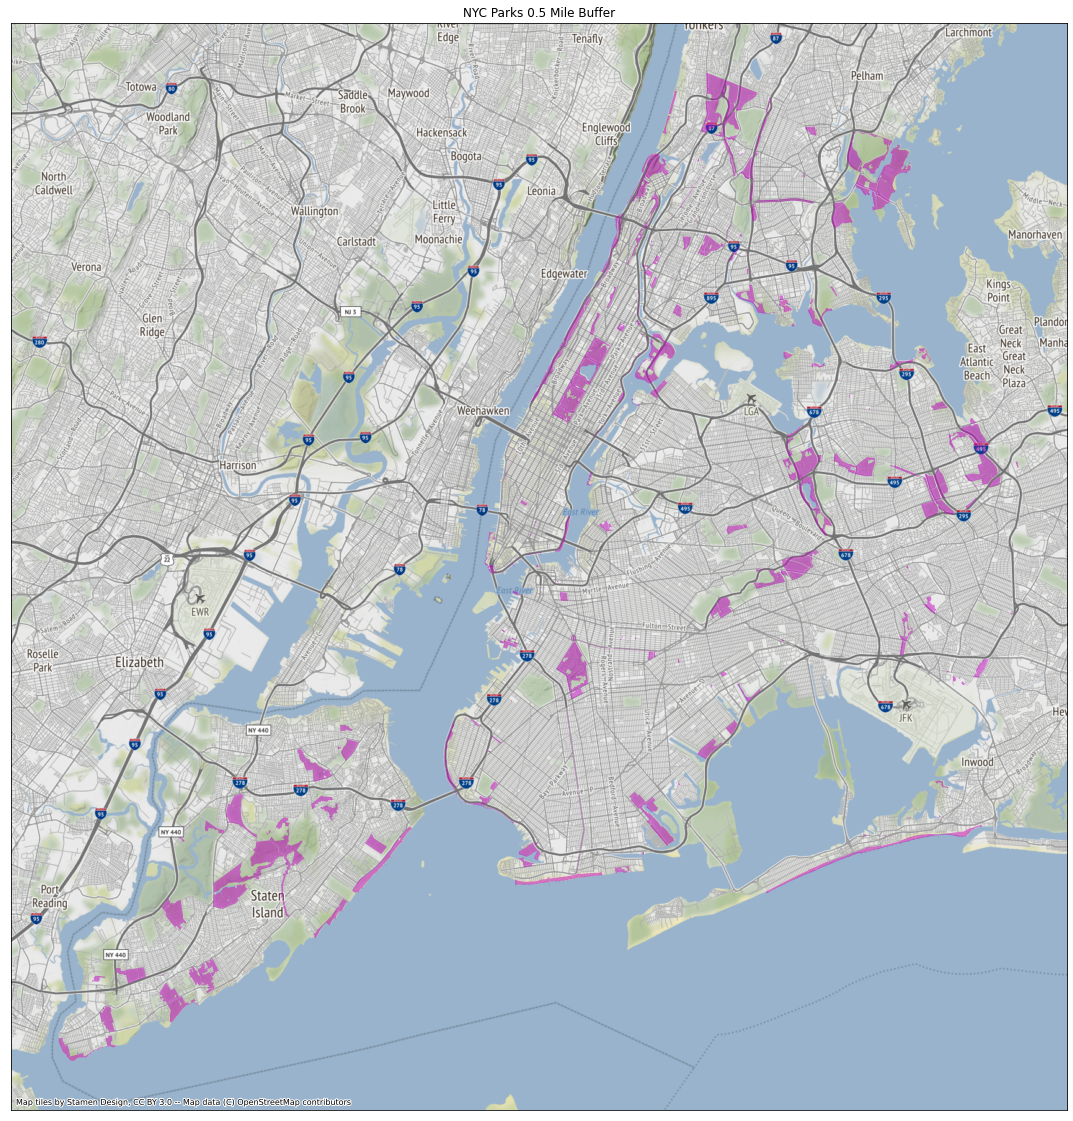

In [7]:
import contextily as ctx
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,20))
# Plot the data. ax=ax means we plot it on the axes that we just created
parkgdf.to_crs('EPSG:3857').plot(color='m', alpha=0.5, ax=ax)


# Let's add a basemap using the contextily library
# Note that we add it to the same axes object. 
# The zoom level is trial and error
ctx.add_basemap(ax, zoom=12)

# and we really don't need the axis ticks and labels, so we set them to an empty list
ax.set_xticks([])
ax.set_yticks([])
plt.title("NYC Parks 0.5 Mile Buffer")

In [8]:
parkgdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   propname         908 non-null    object  
 1   retireddate      0 non-null      object  
 2   zipcode          908 non-null    object  
 3   acres            902 non-null    object  
 4   location         908 non-null    object  
 5   nys_assembly     906 non-null    object  
 6   councildistrict  908 non-null    object  
 7   description      908 non-null    object  
 8   us_congress      906 non-null    object  
 9   gispropnum       904 non-null    object  
 10  retired          908 non-null    bool    
 11  communityboard   907 non-null    object  
 12  department       908 non-null    object  
 13  subcategory      906 non-null    object  
 14  precinct         908 non-null    object  
 15  omppropid        908 non-null    object  
 16  sitename         908 non-null    obj

In [9]:
#one to many join 
# parkgdf['new_column'] = 0
# parkgdf_new = parkgdf.dissolve(by='new_column')
# parkgdf_new

Text(0.5, 1.0, 'NYC Parks 1 Block Buffer')

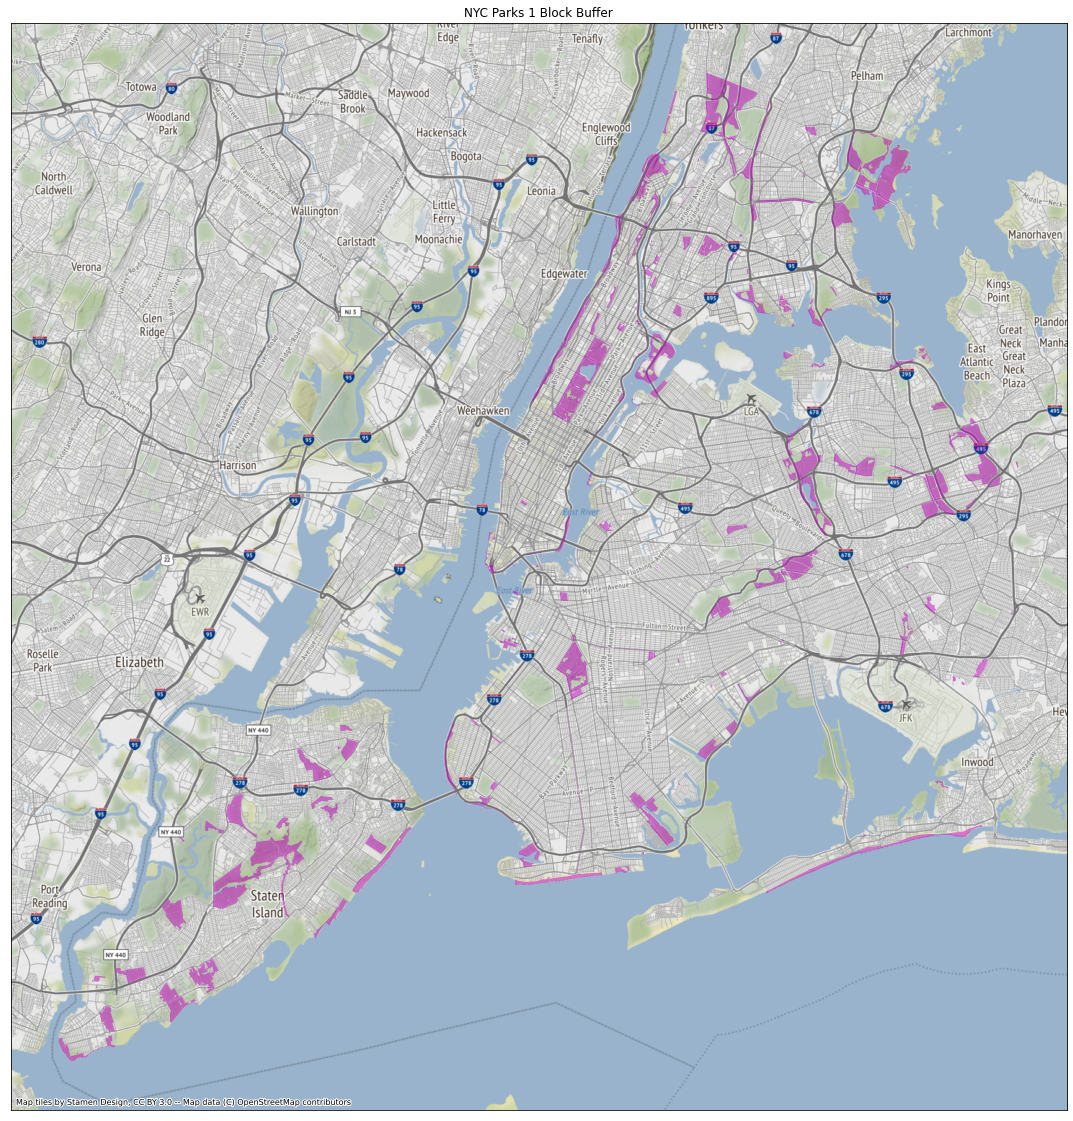

In [10]:
fig, ax = plt.subplots(figsize=(20,20))
# Plot the data. ax=ax means we plot it on the axes that we just created
parkgdf.to_crs('EPSG:3857').plot(color='m', alpha=0.5, ax=ax) 

# Let's add a basemap using the contextily library
# Note that we add it to the same axes object. 
# The zoom level is trial and error
ctx.add_basemap(ax, zoom=12)

# and we really don't need the axis ticks and labels, so we set them to an empty list
ax.set_xticks([])
ax.set_yticks([])
plt.title("NYC Parks 1 Block Buffer")

In [11]:
# I am not sure if this helps a little. 
# Still really messy bc theres a lot of arrests. We should chat about other ways maube? - Steph

Text(0.5, 1.0, 'NYC Parks 1 Block Buffer')

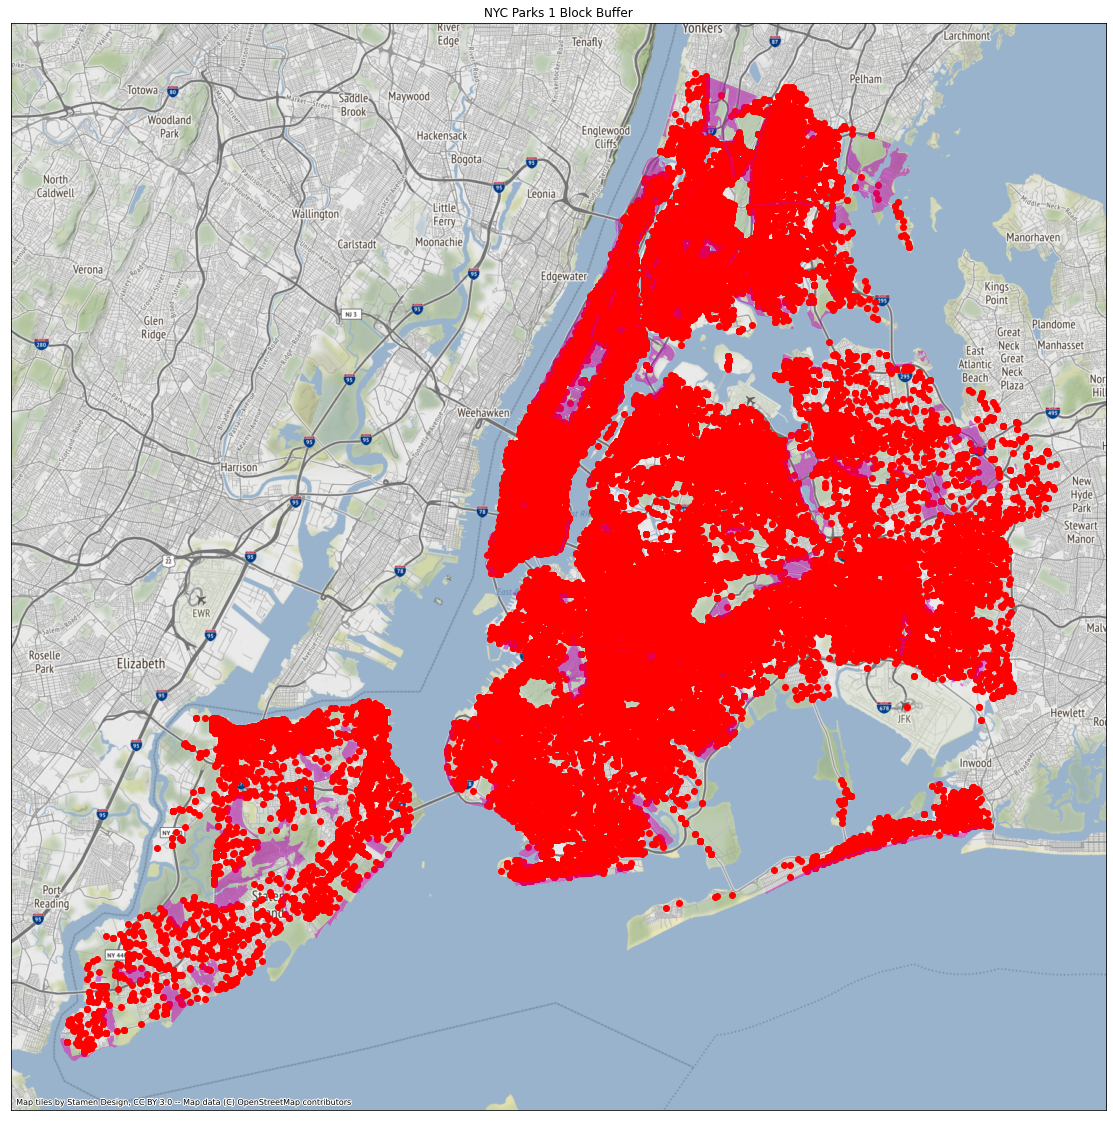

In [12]:
fig, ax = plt.subplots(figsize=(20,20))
# Plot the data. ax=ax means we plot it on the axes that we just created
arrests.to_crs('EPSG:3857').plot(color='r', ax=ax) 
parkgdf.to_crs('EPSG:3857').plot(color='m', alpha=0.5, ax=ax)

# Let's add a basemap using the contextily library
# Note that we add it to the same axes object. 
# The zoom level is trial and error
ctx.add_basemap(ax, zoom=12)

# and we really don't need the axis ticks and labels, so we set them to an empty list
ax.set_xticks([])
ax.set_yticks([])
plt.title("NYC Parks 1 Block Buffer")

In [13]:
parkgdf.to_crs('EPSG:3497', inplace=True)
arrests.to_crs('EPSG:3497', inplace=True)

<AxesSubplot:>

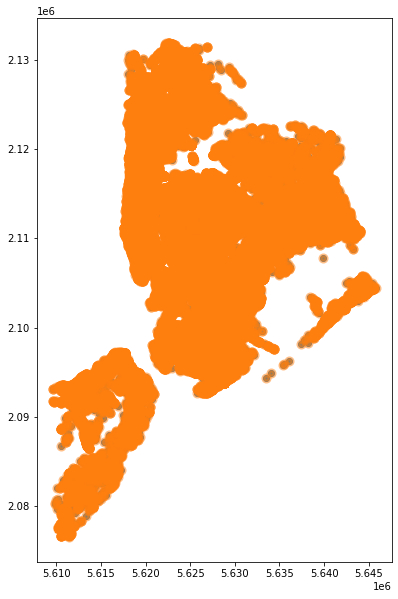

In [15]:
parkarrests = arrests.sjoin_nearest(parkgdf, distance_col='dist_to_park')
# use this join, don't need the centroid
fig, ax=plt.subplots(figsize=(10,10))
parkarrests.plot(ax=ax)
parkarrests.plot(ax=ax, lw=4, alpha=0.5)

In [16]:
parkarrests.dist_to_park.describe()
# are these units in meters? check projection documentation

count    155511.000000
mean        692.921197
std         514.691170
min           0.000000
25%         295.090685
50%         582.302250
75%         998.673443
max        4116.503147
Name: dist_to_park, dtype: float64

In [59]:
parkarrests['hundred_m']=parkarrests.dist_to_park<101
pd.set_option('display.max_columns', None)
parkarrests

arrest_key              arrest_date pd_cd  \
0       238013474  2021-12-18T00:00:00.000   157   
8       233697123  2021-09-17T00:00:00.000   157   
13      230822460  2021-07-14T00:00:00.000   168   
20      224595667  2021-02-19T00:00:00.000   153   
202     237429832  2021-12-06T00:00:00.000   205   
...           ...                      ...   ...   
135134  222855064  2021-01-09T00:00:00.000    29   
138006  223833241  2021-02-02T00:00:00.000   339   
141470  222479318  2021-01-01T00:00:00.000   198   
148850  223872256  2021-02-03T00:00:00.000   268   
152105  223531343  2021-01-25T00:00:00.000   259   

                                 pd_desc  ky_cd  \
0                                 RAPE 1  104.0   
8                                 RAPE 1  104.0   
13                              SODOMY 1  116.0   
20                                RAPE 3  104.0   
202                 TRESPASS 2, CRIMINAL  352.0   
...                                  ...    ...   
135134              NYS PAROLE VIOLATION  995.0   
138006    LARCENY,PETIT FROM OPEN AREAS,  341.0   
141470               CRIMINAL CONTEMPT 1  126.0   
148850                CRIMINAL MIS 2 & 3  121.0   
152105  CRIMINAL MISCHIEF,UNCLASSIFIED 4  351.0   

                             ofns_desc    law_code law_cat_cd arrest_boro  \
0                                 RAPE  PL 1303501          F           Q   
8                                 RAPE  PL 1303501          F           Q   
13                          SEX CRIMES  PL 1305001          F           Q   
20                                RAPE  PL 1302502          F           Q   
202                  CRIMINAL TRESPASS  PL 1401501          M           Q   
...                                ...         ...        ...         ...   
135134           FOR OTHER AUTHORITIES  FOA9000029        NaN           K   
138006                   PETIT LARCENY  PL 1552500          M           Q   
141470         MISCELLANEOUS PENAL LAW  PL 21551B2          F           Q   
148850  CRIMINAL MISCHIEF & RELATED OF  PL 1451000          F           M   
152105  CRIMINAL MISCHIEF & RELATED OF  PL 1450001          M           M   

       arrest_precinct jurisdiction_code age_group perp_sex       perp_race  \
0                  105                97     18-24        M           BLACK   
8                  105                 0     25-44        M           BLACK   
13                 105                 0     45-64        M           BLACK   
20                 105                 0     25-44        M           BLACK   
202                105                 0     25-44        M           BLACK   
...                ...               ...       ...      ...             ...   
135134              76                 0     25-44        M           BLACK   
138006             100                 0     18-24        M           WHITE   
141470             100                 0     25-44        M           WHITE   
148850              34                 0     18-24        M  BLACK HISPANIC   
152105              34                 0     45-64        M           WHITE   

       x_coord_cd y_coord_cd            latitude           longitude  \
0         1057636     203954   40.72618713000002  -73.73523390399998   
8         1057636     203954   40.72618713000002  -73.73523390399998   
13        1057636     203954   40.72618713000002  -73.73523390399998   
20        1057636     203954   40.72618713000002  -73.73523390399998   
202       1055501     197102  40.707397564000075  -73.74300919899997   
...           ...        ...                 ...                 ...   
135134     981936     184577   40.67330588400005  -74.00834343599996   
138006    1031835     151473   40.58231495500007  -73.82869068099996   
141470    1026027     150171  40.578770500000076  -73.84960806399994   
148850    1006093     255796   40.86875668900007  -73.92102578399994   
152105    1006093     255796   40.86875668900007  -73.92102578399994   

                              

I'm gonna go through Yoh's arrest example and do some grouping, looking at if there's a signficant relationship with arrest type within 100m of the park versus arrest type for the whole park. I can also do some looking at race/sex as I do that

Once I have an idea of our potentially signficant arrests that are closer to or within a park, I'll start thinking about how to set up a predictive model to see if the arrrests 

## Arrests Descriptive Statistics

The 'ofns_desc' column is the "description of internal classification corresponding with KY code (more general category than PD description)", which will be more helpful for our purposes than the specifics used within the Police Department.

In [62]:
arrest_by_charge = parkarrests.ofns_desc.value_counts().reset_index()
arrest_by_charge

index  ofns_desc
0      ASSAULT 3 & RELATED OFFENSES      26855
1                    FELONY ASSAULT      15580
2                     PETIT LARCENY      13178
3                   DANGEROUS DRUGS      10450
4           MISCELLANEOUS PENAL LAW      10328
..                              ...        ...
58                 PARKING OFFENSES          3
59                FELONY SEX CRIMES          2
60             ADMINISTRATIVE CODES          2
61  KIDNAPPING AND RELATED OFFENSES          1
62        NEW YORK CITY HEALTH CODE          1

[63 rows x 2 columns]

In [63]:
arrest_by_charge.columns=['charge','count']
arrest_by_charge

charge  count
0      ASSAULT 3 & RELATED OFFENSES  26855
1                    FELONY ASSAULT  15580
2                     PETIT LARCENY  13178
3                   DANGEROUS DRUGS  10450
4           MISCELLANEOUS PENAL LAW  10328
..                              ...    ...
58                 PARKING OFFENSES      3
59                FELONY SEX CRIMES      2
60             ADMINISTRATIVE CODES      2
61  KIDNAPPING AND RELATED OFFENSES      1
62        NEW YORK CITY HEALTH CODE      1

[63 rows x 2 columns]

In [80]:
# for data wrangling
import pandas as pd

# for interactive plots
import plotly
#plotly.tools.set_credentials_file(username='echessman', api_key='bmapr8NX6Okj9F7zXqc8')
import plotly.express as px

# plot the top 20 charges
fig = px.bar(arrest_by_charge.head(20),
       x='charge',
       y='count',
       title='NYPD Arrests by Charge Type (2021)')

fig.show()

In [60]:
parkarrests_grouped=parkarrests.groupby(['hundred_m','ofns_desc', 'perp_sex','perp_race']).count()[['arrest_key']]
parkarrests_grouped.head(50)

arrest_key
hundred_m ofns_desc                            perp_sex perp_race                                 
False     ADMINISTRATIVE CODE                  F        ASIAN / PACIFIC ISLANDER                 2
                                                        BLACK                                    2
                                                        UNKNOWN                                  1
                                                        WHITE HISPANIC                           5
                                               M        ASIAN / PACIFIC ISLANDER                 6
                                                        BLACK                                   26
                                                        BLACK HISPANIC                           6
                                                        WHITE                                   11
                                                        WHITE HISPANIC                          20
          ADMINISTRATIVE CODES                 M        BLACK                                    1
                                                        WHITE                                    1
          AGRICULTURE & MRKTS LAW-UNCLASSIFIED F        ASIAN / PACIFIC ISLANDER                 2
                                                        BLACK                                   13
                                                        BLACK HISPANIC                           1
                                                        WHITE                                    3
                                                        WHITE HISPANIC                           8
                                               M        AMERICAN INDIAN/ALASKAN NATIVE           1
                                                        ASIAN / PACIFIC ISLANDER                 2
                                                        BLACK                                   24
                                                        BLACK HISPANIC                           3
                                                        WHITE                                    3
                                                        WHITE HISPANIC                           8
          ALCOHOLIC BEVERAGE CONTROL LAW       F        ASIAN / PACIFIC ISLANDER                 9
                                                        BLACK                                   44
                                                        BLACK HISPANIC                           7
                                                        UNKNOWN                                  1
                                                        WHITE                                    3
                                                        WHITE HISPANIC                          33
                                               M        AMERICAN INDIAN/ALASKAN NATIVE           1
                                                        ASIAN / PACIFIC ISLANDER                12
                                                        BLACK                                   93
                                                        BLACK HISPANIC                          28
                                                        UNKNOWN                                  2
                                                        WHITE                                   11
                                                        WHITE HISPANIC                          57
          ANTICIPATORY OFFENSES                F        BLACK                                    5
                                                        BLACK HISPANIC                           2
                                                        WHITE                                    2
                                                        WHITE HISPANIC                           2
                             

In [66]:
# flatten the multi-index, multi-level dataframe
parkarrests_flat = parkarrests_grouped.reset_index()
parkarrests_flat

# rename the arrest_key column to count
parkarrests_flat = parkarrests_flat.rename(columns={'arrest_key':'count', 'ofns_desc':'arrest description'})
parkarrests_flat

hundred_m        arrest description perp_sex                 perp_race  \
0        False       ADMINISTRATIVE CODE        F  ASIAN / PACIFIC ISLANDER   
1        False       ADMINISTRATIVE CODE        F                     BLACK   
2        False       ADMINISTRATIVE CODE        F                   UNKNOWN   
3        False       ADMINISTRATIVE CODE        F            WHITE HISPANIC   
4        False       ADMINISTRATIVE CODE        M  ASIAN / PACIFIC ISLANDER   
..         ...                       ...      ...                       ...   
984       True  VEHICLE AND TRAFFIC LAWS        M                     BLACK   
985       True  VEHICLE AND TRAFFIC LAWS        M            BLACK HISPANIC   
986       True  VEHICLE AND TRAFFIC LAWS        M                   UNKNOWN   
987       True  VEHICLE AND TRAFFIC LAWS        M                     WHITE   
988       True  VEHICLE AND TRAFFIC LAWS        M            WHITE HISPANIC   

     count  
0        2  
1        2  
2        1  
3        5  
4        6  
..     ...  
984    261  
985     70  
986      4  
987     64  
988    160  

[989 rows x 5 columns]

In [67]:
# make a stacked bar chart
fig = px.bar(parkarrests_flat,
       x='arrest description',
       y='count',
       # this creates the "stack"
)

fig.show()

In [68]:
# make a stacked bar chart
fig = px.bar(parkarrests_flat,
       x='arrest description',
       y='count',
       color='hundred_m' # this creates the "stack"
)

fig.show()

This is interesting, because it appears that most of our arrests are not happening within the parks. It looks like it might be a similar distribution of arrests though, so I will create a df to look just at the ones within 100m. 

We'll also want to see if there's a difference in the race/sex breakdown of park adjacent arrests and the total arrests, so let's look at those as well: 

In [69]:
# make a stacked bar chart
fig = px.bar(parkarrests_flat,
       x='arrest description',
       y='count',
       color='perp_race' # this creates the "stack"
)

fig.show()

In [70]:
# make a stacked bar chart
fig = px.bar(parkarrests_flat,
       x='arrest description',
       y='count',
       color='perp_sex' # this creates the "stack"
)

fig.show()

## Descriptive Statistics: Arrests within 100m of a Park

In [87]:
hundredmeterdf = parkarrests[parkarrests.hundred_m==True]
hundredmeterdf

arrest_key              arrest_date pd_cd  \
22524   234057760  2021-09-25T00:00:00.000   101   
8101    238331935  2021-12-27T00:00:00.000   109   
12836   236160727  2021-11-11T00:00:00.000   792   
13917   238384318  2021-12-29T00:00:00.000   203   
18143   238333522  2021-12-27T00:00:00.000   109   
...           ...                      ...   ...   
126092  225359770  2021-03-09T00:00:00.000   115   
128810  225426622  2021-03-10T00:00:00.000   792   
135134  222855064  2021-01-09T00:00:00.000    29   
148850  223872256  2021-02-03T00:00:00.000   268   
152105  223531343  2021-01-25T00:00:00.000   259   

                                 pd_desc  ky_cd  \
22524                          ASSAULT 3  344.0   
8101            ASSAULT 2,1,UNCLASSIFIED  106.0   
12836           WEAPONS POSSESSION 1 & 2  118.0   
13917               TRESPASS 3, CRIMINAL  352.0   
18143           ASSAULT 2,1,UNCLASSIFIED  106.0   
...                                  ...    ...   
126092           RECKLESS ENDANGERMENT 2  355.0   
128810          WEAPONS POSSESSION 1 & 2  118.0   
135134              NYS PAROLE VIOLATION  995.0   
148850                CRIMINAL MIS 2 & 3  121.0   
152105  CRIMINAL MISCHIEF,UNCLASSIFIED 4  351.0   

                             ofns_desc    law_code law_cat_cd arrest_boro  \
22524     ASSAULT 3 & RELATED OFFENSES  PL 1200001          M           Q   
8101                    FELONY ASSAULT  PL 1201001          F           K   
12836                DANGEROUS WEAPONS  PL 265031B          F           K   
13917                CRIMINAL TRESPASS  PL 140100E          M           K   
18143                   FELONY ASSAULT  PL 1201001          F           K   
...                                ...         ...        ...         ...   
126092     OFFENSES AGAINST THE PERSON  PL 1202000          M           B   
128810               DANGEROUS WEAPONS  PL 265031B          F           K   
135134           FOR OTHER AUTHORITIES  FOA9000029        NaN           K   
148850  CRIMINAL MISCHIEF & RELATED OF  PL 1451000          F           M   
152105  CRIMINAL MISCHIEF & RELATED OF  PL 1450001          M           M   

       arrest_precinct jurisdiction_code age_group perp_sex       perp_race  \
22524              111                 0     25-44        M           WHITE   
8101                69                 2       <18        F           BLACK   
12836               69                 0     18-24        M           BLACK   
13917               69                 2     18-24        M           BLACK   
18143               69                 0     18-24        F           BLACK   
...                ...               ...       ...      ...             ...   
126092              45                 0     18-24        M  BLACK HISPANIC   
128810              71                 0     18-24        M           BLACK   
135134              76                 0     25-44        M           BLACK   
148850              34                 0     18-24        M  BLACK HISPANIC   
152105              34                 0     45-64        M           WHITE   

       x_coord_cd y_coord_cd           latitude           longitude  \
22524     1052607     204939  40.72893099600003  -73.75336780399994   
8101      1016452     170415  40.63437605200004  -73.88398062199997   
12836     1016452     170415  40.63437605200004  -73.88398062199997   
13917     1017221     170298  40.63405208300003       -73.881210561   
18143     1016452     170415  40.63437605200004  -73.88398062199997   
...           ...        ...                ...                 ...   
126092    1039267     254707  40.86562329900005  -73.80109091499997   
128810    1004101     182536  40.66768184600004  -73.92844443099993   
135134     981936     184577  40.67330588400005  -74.00834343599996   
148850    1006093     255796  40.86875668900007  -73.92102578399994   
152105    1006093     255796  40.86875668900007  -73.92102578399994   

                                          

In [77]:
close_arrest_by_charge = hundredmeterdf.ofns_desc.value_counts().reset_index()
close_arrest_by_charge

index  ofns_desc
0           ASSAULT 3 & RELATED OFFENSES       2044
1                         FELONY ASSAULT       1146
2                        DANGEROUS DRUGS        941
3                          PETIT LARCENY        887
4         CRIMINAL MISCHIEF & RELATED OF        747
5                MISCELLANEOUS PENAL LAW        675
6                      DANGEROUS WEAPONS        642
7               VEHICLE AND TRAFFIC LAWS        629
8                                ROBBERY        599
9                          GRAND LARCENY        533
10              OFFENSES INVOLVING FRAUD        426
11        OFFENSES AGAINST PUBLIC ADMINI        367
12                              BURGLARY        365
13                 FOR OTHER AUTHORITIES        272
14                               FORGERY        271
15        INTOXICATED & IMPAIRED DRIVING        267
16         OFF. AGNST PUB ORD SENSBLTY &        263
17        OTHER OFFENSES RELATED TO THEF        173
18         POSSESSION OF STOLEN PROPERTY        170
19              OTHER TRAFFIC INFRACTION        170
20        GRAND LARCENY OF MOTOR VEHICLE        110
21           OFFENSES AGAINST THE PERSON         97
22        MURDER & NON-NEGL. MANSLAUGHTE         95
23                     CRIMINAL TRESPASS         79
24                            SEX CRIMES         76
25          NYS LAWS-UNCLASSIFIED FELONY         52
26                       BURGLAR'S TOOLS         42
27          INTOXICATED/IMPAIRED DRIVING         37
28                                FRAUDS         36
29         UNAUTHORIZED USE OF A VEHICLE         33
30        OTHER STATE LAWS (NON PENAL LA         26
31                           THEFT-FRAUD         17
32                                 ARSON         16
33                              GAMBLING         15
34                      OTHER STATE LAWS         14
35                                  RAPE         13
36        OFFENSES AGAINST PUBLIC SAFETY         13
37        ALCOHOLIC BEVERAGE CONTROL LAW         12
38                     THEFT OF SERVICES          9
39       PROSTITUTION & RELATED OFFENSES          9
40                 ANTICIPATORY OFFENSES          9
41                   ADMINISTRATIVE CODE          7
42         KIDNAPPING & RELATED OFFENSES          6
43                    MOVING INFRACTIONS          5
44  AGRICULTURE & MRKTS LAW-UNCLASSIFIED          4
45                  ENDAN WELFARE INCOMP          4
46                    DISORDERLY CONDUCT          3
47          OFFENSES RELATED TO CHILDREN          2
48                         HARRASSMENT 2          2
49      OTHER STATE LAWS (NON PENAL LAW)          2
50            HOMICIDE-NEGLIGENT-VEHICLE          1

In [84]:
close_arrest_by_charge.columns=['charge','count']
close_arrest_by_charge

charge  count
0           ASSAULT 3 & RELATED OFFENSES   2044
1                         FELONY ASSAULT   1146
2                        DANGEROUS DRUGS    941
3                          PETIT LARCENY    887
4         CRIMINAL MISCHIEF & RELATED OF    747
5                MISCELLANEOUS PENAL LAW    675
6                      DANGEROUS WEAPONS    642
7               VEHICLE AND TRAFFIC LAWS    629
8                                ROBBERY    599
9                          GRAND LARCENY    533
10              OFFENSES INVOLVING FRAUD    426
11        OFFENSES AGAINST PUBLIC ADMINI    367
12                              BURGLARY    365
13                 FOR OTHER AUTHORITIES    272
14                               FORGERY    271
15        INTOXICATED & IMPAIRED DRIVING    267
16         OFF. AGNST PUB ORD SENSBLTY &    263
17        OTHER OFFENSES RELATED TO THEF    173
18         POSSESSION OF STOLEN PROPERTY    170
19              OTHER TRAFFIC INFRACTION    170
20        GRAND LARCENY OF MOTOR VEHICLE    110
21           OFFENSES AGAINST THE PERSON     97
22        MURDER & NON-NEGL. MANSLAUGHTE     95
23                     CRIMINAL TRESPASS     79
24                            SEX CRIMES     76
25          NYS LAWS-UNCLASSIFIED FELONY     52
26                       BURGLAR'S TOOLS     42
27          INTOXICATED/IMPAIRED DRIVING     37
28                                FRAUDS     36
29         UNAUTHORIZED USE OF A VEHICLE     33
30        OTHER STATE LAWS (NON PENAL LA     26
31                           THEFT-FRAUD     17
32                                 ARSON     16
33                              GAMBLING     15
34                      OTHER STATE LAWS     14
35                                  RAPE     13
36        OFFENSES AGAINST PUBLIC SAFETY     13
37        ALCOHOLIC BEVERAGE CONTROL LAW     12
38                     THEFT OF SERVICES      9
39       PROSTITUTION & RELATED OFFENSES      9
40                 ANTICIPATORY OFFENSES      9
41                   ADMINISTRATIVE CODE      7
42         KIDNAPPING & RELATED OFFENSES      6
43                    MOVING INFRACTIONS      5
44  AGRICULTURE & MRKTS LAW-UNCLASSIFIED      4
45                  ENDAN WELFARE INCOMP      4
46                    DISORDERLY CONDUCT      3
47          OFFENSES RELATED TO CHILDREN      2
48                         HARRASSMENT 2      2
49      OTHER STATE LAWS (NON PENAL LAW)      2
50            HOMICIDE-NEGLIGENT-VEHICLE      1

In [82]:
# for data wrangling
import pandas as pd

# for interactive plots
import plotly
#plotly.tools.set_credentials_file(username='echessman', api_key='bmapr8NX6Okj9F7zXqc8')
import plotly.express as px

# plot the top 20 charges
fig = px.bar(close_arrest_by_charge.head(20),
       x='charge',
       y='count',
       title='NYPD Arrests by Charge Type Within 100m of a Park (2021)')

fig.show()

That's not ideal... this distribution looks almost the exact same as our original one.

In [91]:
hundredmeterdf_grouped=hundredmeterdf.groupby(['ofns_desc', 'perp_sex','perp_race']).count()[['arrest_key']]
hundredmeterdf_grouped.head(50)

arrest_key
ofns_desc                            perp_sex perp_race                                 
ADMINISTRATIVE CODE                  M        ASIAN / PACIFIC ISLANDER                 1
                                              BLACK                                    3
                                              BLACK HISPANIC                           1
                                              WHITE                                    1
                                              WHITE HISPANIC                           1
AGRICULTURE & MRKTS LAW-UNCLASSIFIED F        BLACK                                    1
                                              WHITE                                    1
                                     M        BLACK                                    1
                                              WHITE                                    1
ALCOHOLIC BEVERAGE CONTROL LAW       F        BLACK HISPANIC                           3
                                              WHITE HISPANIC                           2
                                     M        ASIAN / PACIFIC ISLANDER                 1
                                              BLACK                                    1
                                              BLACK HISPANIC                           2
                                              WHITE HISPANIC                           3
ANTICIPATORY OFFENSES                F        BLACK                                    1
                                              WHITE HISPANIC                           1
                                     M        BLACK                                    4
                                              WHITE HISPANIC                           3
ARSON                                F        BLACK                                    1
                                              WHITE HISPANIC                           1
                                     M        BLACK                                    6
                                              UNKNOWN                                  1
                                              WHITE                                    3
                                              WHITE HISPANIC                           4
ASSAULT 3 & RELATED OFFENSES         F        AMERICAN INDIAN/ALASKAN NATIVE           1
                                              ASIAN / PACIFIC ISLANDER                 8
                                              BLACK                                  245
                                              BLACK HISPANIC                          63
                                              UNKNOWN                                  1
                                              WHITE                                   39
                                              WHITE HISPANIC                         162
                                     M        AMERICAN INDIAN/ALASKAN NATIVE           4
                                              ASIAN / PACIFIC ISLANDER                78
                                              BLACK                                  678
                                              BLACK HISPANIC                         191
                                              UNKNOWN                                  1
                                              WHITE                                  165
                                              WHITE HISPANIC                         408
BURGLAR'S TOOLS                      F        BLACK                                    2
                                              WHITE                                    2
                                     M        BLACK                                   21
                                              BLACK HISPANIC                           1
                                              WHITE                      

In [93]:
# flatten the multi-index, multi-level dataframe
hundredmeterdf_flat = hundredmeterdf_grouped.reset_index()
hundredmeterdf_flat

# rename the arrest_key column to count
hundredmeterdf_flat = hundredmeterdf_flat.rename(columns={'arrest_key':'count', 'ofns_desc':'arrest description'})
hundredmeterdf_flat

arrest description perp_sex                 perp_race  count
0         ADMINISTRATIVE CODE        M  ASIAN / PACIFIC ISLANDER      1
1         ADMINISTRATIVE CODE        M                     BLACK      3
2         ADMINISTRATIVE CODE        M            BLACK HISPANIC      1
3         ADMINISTRATIVE CODE        M                     WHITE      1
4         ADMINISTRATIVE CODE        M            WHITE HISPANIC      1
..                        ...      ...                       ...    ...
373  VEHICLE AND TRAFFIC LAWS        M                     BLACK    261
374  VEHICLE AND TRAFFIC LAWS        M            BLACK HISPANIC     70
375  VEHICLE AND TRAFFIC LAWS        M                   UNKNOWN      4
376  VEHICLE AND TRAFFIC LAWS        M                     WHITE     64
377  VEHICLE AND TRAFFIC LAWS        M            WHITE HISPANIC    160

[378 rows x 4 columns]

In [95]:
# make a stacked bar chart
fig = px.bar(hundredmeterdf_flat,
       x='arrest description',
       y='count',
       # this creates the "stack"
)

fig.show()

In [96]:
# make a stacked bar chart
fig = px.bar(hundredmeterdf_flat,
       x='arrest description',
       y='count',
       color='perp_race' # this creates the "stack"
)

fig.show()

In [97]:
# make a stacked bar chart
fig = px.bar(hundredmeterdf_flat,
       x='arrest description',
       y='count',
       color='perp_sex' # this creates the "stack"
)

fig.show()

### Other stuff I was messing with before figuring out the method we used above:

Trying [this method](https://gis.stackexchange.com/questions/271733/geopandas-dissolve-overlapping-polygons) to dissolve my parks polygons (see the last post)

In [10]:
parks_smooth = gpd.GeoDataFrame(
  geometry=[parkgdf.unary_union]).explode(
  index_parts=False).reset_index(
  drop=True)

parks_smooth
parks_smooth = gpd.GeoDataFrame(parks_smooth, geometry='geometry')


In [12]:
parks_smooth.head()

geometry
0  POLYGON ((278759.769 36793.647, 278759.510 367...
1  POLYGON ((279231.661 37002.447, 279237.895 370...
2  POLYGON ((281025.227 38009.039, 280875.882 379...
3  POLYGON ((283232.871 38389.640, 283228.637 383...
4  POLYGON ((284153.517 39220.376, 284154.291 392...

ValueError: Cannot transform naive geometries.  Please set a crs on the object first.

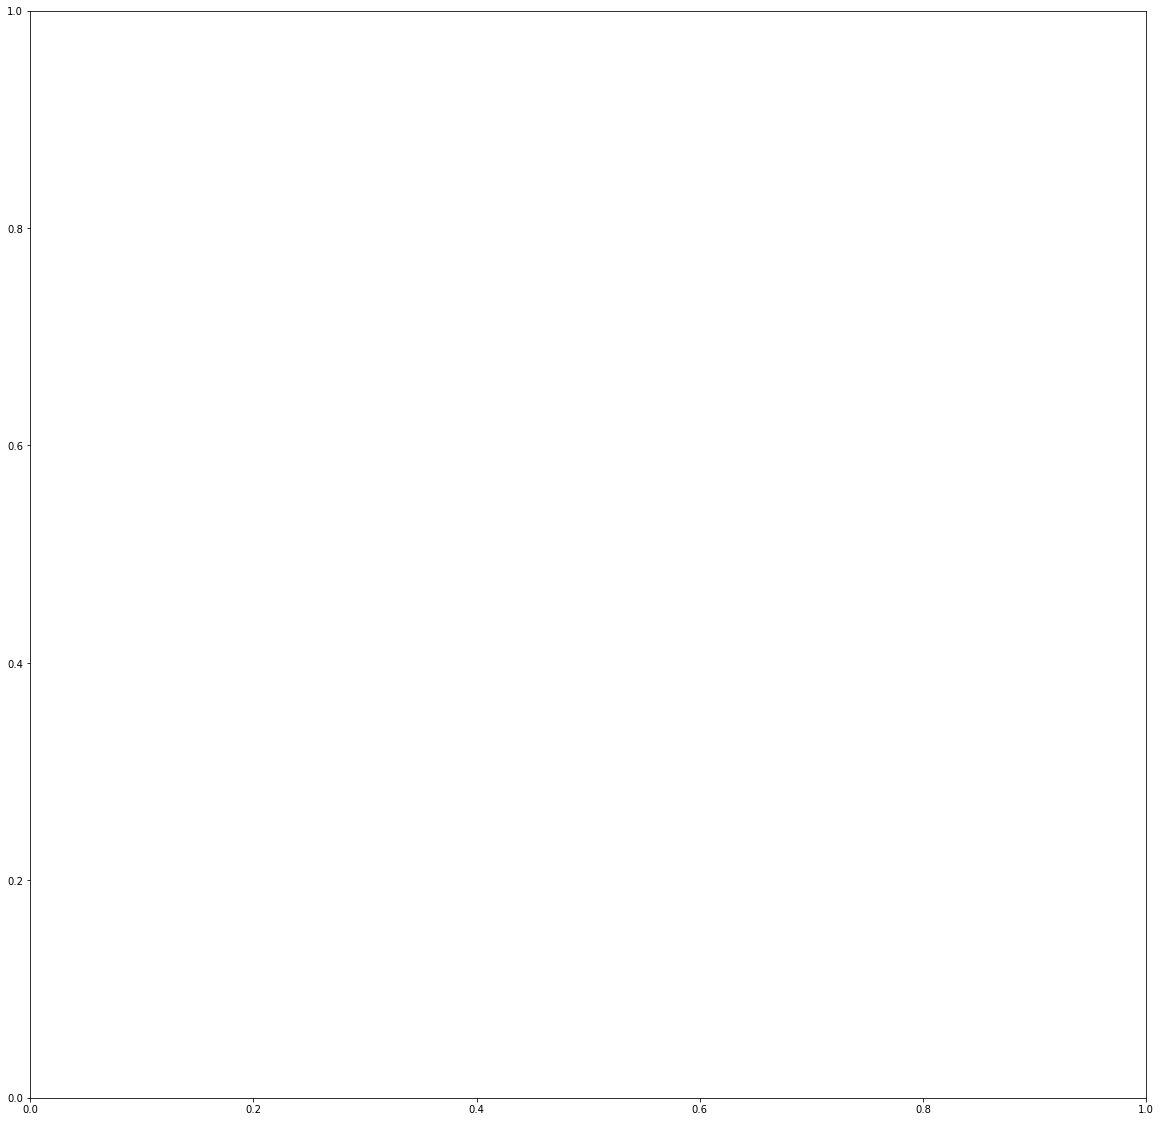

In [11]:
fig, ax = plt.subplots(figsize=(20,20))
# Plot the data. ax=ax means we plot it on the axes that we just created
parks_smooth.to_crs('EPSG:3857').plot(color='m', alpha=0.5, ax=ax) 

# Let's add a basemap using the contextily library
# Note that we add it to the same axes object. 
# The zoom level is trial and error
ctx.add_basemap(ax, zoom=12)

# and we really don't need the axis ticks and labels, so we set them to an empty list
ax.set_xticks([])
ax.set_yticks([])
plt.title("NYC Parks 1 Block Buffer")

In [ ]:
parkgdf = parkgdf.to_crs('EPSG:4326')
# next step will be to use the "sjoin_nearest" we learned in lecture to look at the arrests happening near parks. Stay turned!

Adam recommended that I do a nearest spatial join instead of trying to use the buffered parks layer to join the arrests to. So that's what I'm going to move to working on here:

In [12]:
parkgdf = parkgdf.to_crs('EPSG:3857')
arrests = arrests.to_crs('EPSG:3857')

In [16]:
parksarrests = arrests.sjoin_nearest(parkgdf, distance_col='dist_to_park')
pd.set_option('display.max_columns', None)
parksarrests

arrest_key              arrest_date pd_cd  \
0       238013474  2021-12-18T00:00:00.000   157   
8       233697123  2021-09-17T00:00:00.000   157   
13      230822460  2021-07-14T00:00:00.000   168   
20      224595667  2021-02-19T00:00:00.000   153   
202     237429832  2021-12-06T00:00:00.000   205   
...           ...                      ...   ...   
135134  222855064  2021-01-09T00:00:00.000    29   
138006  223833241  2021-02-02T00:00:00.000   339   
141470  222479318  2021-01-01T00:00:00.000   198   
148850  223872256  2021-02-03T00:00:00.000   268   
152105  223531343  2021-01-25T00:00:00.000   259   

                                 pd_desc  ky_cd  \
0                                 RAPE 1  104.0   
8                                 RAPE 1  104.0   
13                              SODOMY 1  116.0   
20                                RAPE 3  104.0   
202                 TRESPASS 2, CRIMINAL  352.0   
...                                  ...    ...   
135134              NYS PAROLE VIOLATION  995.0   
138006    LARCENY,PETIT FROM OPEN AREAS,  341.0   
141470               CRIMINAL CONTEMPT 1  126.0   
148850                CRIMINAL MIS 2 & 3  121.0   
152105  CRIMINAL MISCHIEF,UNCLASSIFIED 4  351.0   

                             ofns_desc    law_code law_cat_cd arrest_boro  \
0                                 RAPE  PL 1303501          F           Q   
8                                 RAPE  PL 1303501          F           Q   
13                          SEX CRIMES  PL 1305001          F           Q   
20                                RAPE  PL 1302502          F           Q   
202                  CRIMINAL TRESPASS  PL 1401501          M           Q   
...                                ...         ...        ...         ...   
135134           FOR OTHER AUTHORITIES  FOA9000029        NaN           K   
138006                   PETIT LARCENY  PL 1552500          M           Q   
141470         MISCELLANEOUS PENAL LAW  PL 21551B2          F           Q   
148850  CRIMINAL MISCHIEF & RELATED OF  PL 1451000          F           M   
152105  CRIMINAL MISCHIEF & RELATED OF  PL 1450001          M           M   

       arrest_precinct jurisdiction_code age_group perp_sex       perp_race  \
0                  105                97     18-24        M           BLACK   
8                  105                 0     25-44        M           BLACK   
13                 105                 0     45-64        M           BLACK   
20                 105                 0     25-44        M           BLACK   
202                105                 0     25-44        M           BLACK   
...                ...               ...       ...      ...             ...   
135134              76                 0     25-44        M           BLACK   
138006             100                 0     18-24        M           WHITE   
141470             100                 0     25-44        M           WHITE   
148850              34                 0     18-24        M  BLACK HISPANIC   
152105              34                 0     45-64        M           WHITE   

       x_coord_cd y_coord_cd            latitude           longitude  \
0         1057636     203954   40.72618713000002  -73.73523390399998   
8         1057636     203954   40.72618713000002  -73.73523390399998   
13        1057636     203954   40.72618713000002  -73.73523390399998   
20        1057636     203954   40.72618713000002  -73.73523390399998   
202       1055501     197102  40.707397564000075  -73.74300919899997   
...           ...        ...                 ...                 ...   
135134     981936     184577   40.67330588400005  -74.00834343599996   
138006    1031835     151473   40.58231495500007  -73.82869068099996   
141470    1026027     150171  40.578770500000076  -73.84960806399994   
148850    1006093     255796   40.86875668900007  -73.92102578399994   
152105    1006093     255796   40.86875668900007  -73.92102578399994   

                              

<AxesSubplot:>

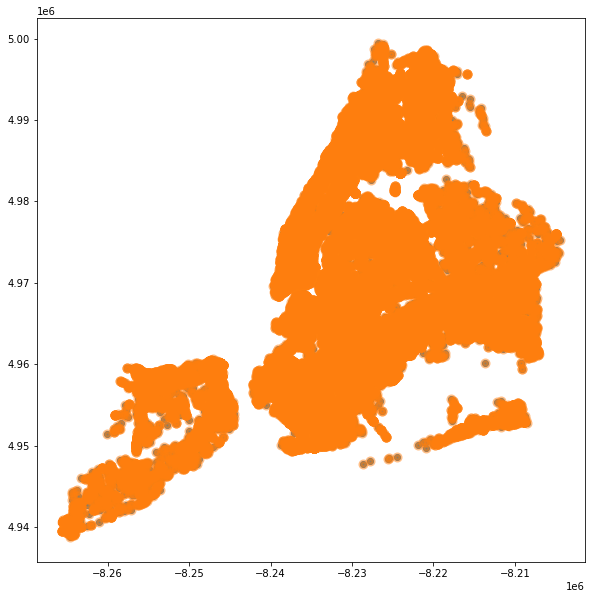

In [17]:
# convert the parks polygons to centroids 
parksarrests_centroids = parksarrests.copy()
parksarrests_centroids.geometry = parksarrests.geometry.centroid

# map to show the centroids 
fig, ax=plt.subplots(figsize=(10,10))
parksarrests_centroids.plot(ax=ax)
parksarrests.plot(ax=ax, lw=4, alpha=0.5)